In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 4.2 MB/s 
     |████████████████████████████████| 88 kB 2.2 MB/s 
     |████████████████████████████████| 6.8 MB 19.5 MB/s 
     |████████████████████████████████| 2.0 MB 30.1 MB/s 
     |████████████████████████████████| 25.9 MB 55.4 MB/s 
     |████████████████████████████████| 167 kB 41.1 MB/s 
     |████████████████████████████████| 1.7 MB 12.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 636 kB 49.2 MB/s 
     |████████████████████████████████| 4.8 MB 44.5 MB/s 
     |████████████████████████████████| 3.3 MB 42.4 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 17.0 MB 26.8 MB/s 
     |████████████████████████████████|

In [2]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

In [3]:
df = pd.read_csv('/content/winequality-white.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
"""
Target Value: 
quality (a number between 0 – 10 can be considered as categories)
"""

In [4]:
data = df.sample(frac=0.9, random_state=923) # take some rows out of the dataset 
data_unseen = df.drop(data.index) # put the sample data in variable data_unseen to be used as test data 
data.reset_index(drop=True,inplace=True) # reset the index of the table after we have removed some of the records 
data_unseen.reset_index(drop=True,inplace=True)# have the index of the table start from 0,1,2,3.. instead of the old index from the old table

In [7]:
data.shape

(4408, 12)

In [8]:
data_unseen.shape

(490, 12)

In [5]:
from pycaret.classification import *

In [6]:
exp1 = setup(data=data, target= 'quality')

,Description,Value
0,session_id,6329
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(4408, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6597,0.2556,0.3959,0.6640,0.6463,0.4653,0.4736,0.678
rf,Random Forest Classifier,0.6541,0.2526,0.3957,0.6640,0.6418,0.4580,0.4652,0.996
lightgbm,Light Gradient Boosting Machine,0.6405,0.2470,0.3961,0.6409,0.6305,0.4452,0.4487,0.740
gbc,Gradient Boosting Classifier,0.5870,0.2342,0.3285,0.5871,0.5724,0.3507,0.3585,4.041
dt,Decision Tree Classifier,0.5666,0.2122,0.3691,0.5682,0.5659,0.3587,0.3593,0.035
lda,Linear Discriminant Analysis,0.5284,0.2155,0.2897,0.5080,0.5009,0.2441,0.2548,0.023
ridge,Ridge Classifier,0.5225,0.0000,0.2155,0.4637,0.4502,0.1950,0.2208,0.018
lr,Logistic Regression,0.5196,0.2114,0.2239,0.4769,0.4709,0.2070,0.2230,2.167
qda,Quadratic Discriminant Analysis,0.4616,0.2111,0.3119,0.4824,0.4479,0.2467,0.2587,0.023
knn,K Neighbors Classifier,0.4603,0.1898,0.2383,0.4443,0.4456,0.1665,0.1681,0.125


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6329, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [8]:
print(best)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6329, verbose=0,
                     warm_start=False)


In [10]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6796,0.8567,0.3666,0.6791,0.6668,0.4986,0.5048
1,0.6472,0.8409,0.3192,0.6400,0.6298,0.4441,0.4512
2,0.6667,0.0000,0.4099,0.6740,0.6476,0.4693,0.4868
3,0.6149,0.0000,0.3937,0.6154,0.6029,0.3976,0.4037
4,0.6505,0.0000,0.3994,0.6556,0.6383,0.4534,0.4602
5,0.6396,0.0000,0.4164,0.6461,0.6288,0.4334,0.4422
6,0.6818,0.0000,0.4405,0.6932,0.6708,0.5010,0.5082
7,0.6981,0.0000,0.3990,0.7016,0.6812,0.5274,0.5335
8,0.6201,0.0000,0.3934,0.6278,0.6088,0.4017,0.4093


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6329, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [9]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6893,0.8551,0.3724,0.7041,0.6769,0.5116,0.5191
1,0.6343,0.8251,0.3250,0.6406,0.6191,0.4236,0.4316
2,0.6764,0.0000,0.4196,0.6995,0.6601,0.4844,0.5016
3,0.6214,0.0000,0.3937,0.6367,0.6069,0.4042,0.4117
4,0.6084,0.0000,0.3820,0.6133,0.5982,0.3888,0.3937
5,0.6169,0.0000,0.4068,0.6176,0.6070,0.4030,0.4077
6,0.6948,0.0000,0.4520,0.7009,0.6852,0.5249,0.5299
7,0.6818,0.0000,0.3918,0.7034,0.6654,0.4996,0.5066
8,0.6461,0.0000,0.4019,0.6478,0.6359,0.4504,0.4541


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6329, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [19]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4531,0.6298,0.1429,0.2053,0.2825,0.0,0.0
1,0.4531,0.6442,0.1429,0.2053,0.2825,0.0,0.0
2,0.4498,0.0000,0.1667,0.2024,0.2791,0.0,0.0
3,0.4498,0.0000,0.1667,0.2024,0.2791,0.0,0.0
4,0.4498,0.0000,0.1667,0.2024,0.2791,0.0,0.0
5,0.4513,0.0000,0.1667,0.2037,0.2807,0.0,0.0
6,0.4513,0.0000,0.1667,0.2037,0.2807,0.0,0.0
7,0.4513,0.0000,0.1667,0.2037,0.2807,0.0,0.0
8,0.4513,0.0000,0.1667,0.2037,0.2807,0.0,0.0


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=3, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.05, min_impurity_split=None,
                     min_samples_leaf=6, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
                     oob_score=False, random_state=6329, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [11]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4790,0.6536,0.2356,0.4548,0.4659,0.2029,0.2036
1,0.4207,0.6070,0.1831,0.3981,0.4081,0.1143,0.1148
2,0.4725,0.0000,0.2571,0.4727,0.4550,0.1680,0.1717
3,0.4757,0.0000,0.2367,0.4422,0.4507,0.1770,0.1802
4,0.4434,0.0000,0.2345,0.4302,0.4267,0.1362,0.1379
5,0.4578,0.0000,0.2532,0.4446,0.4373,0.1551,0.1583
6,0.4708,0.0000,0.2526,0.4563,0.4592,0.1834,0.1844
7,0.4545,0.0000,0.2500,0.4372,0.4449,0.1722,0.1725
8,0.4643,0.0000,0.2541,0.4465,0.4507,0.1796,0.1805


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [12]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4887,0.6667,0.1943,0.4459,0.4529,0.1685,0.1763
1,0.4466,0.6012,0.1769,0.4113,0.4113,0.0968,0.1018
2,0.4822,0.0000,0.2154,0.4412,0.4333,0.1427,0.1553
3,0.4628,0.0000,0.2039,0.4133,0.4120,0.1123,0.1214
4,0.4595,0.0000,0.2112,0.4168,0.4216,0.1209,0.1270
5,0.4643,0.0000,0.2125,0.4263,0.4253,0.1278,0.1339
6,0.4545,0.0000,0.2058,0.4509,0.4141,0.0989,0.1062
7,0.5065,0.0000,0.2502,0.4924,0.4723,0.1994,0.2082
8,0.4935,0.0000,0.2177,0.4296,0.4441,0.1674,0.1787


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=27, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [20]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4854,0.7626,0.3811,0.5537,0.4773,0.3034,0.3220
1,0.4822,0.7372,0.3629,0.5440,0.4622,0.3029,0.3251
2,0.4951,0.0000,0.4363,0.5464,0.4891,0.3143,0.3288
3,0.4595,0.0000,0.3870,0.4960,0.4452,0.2611,0.2758
4,0.4693,0.0000,0.4337,0.5291,0.4451,0.2901,0.3129
5,0.4383,0.0000,0.4040,0.4752,0.4219,0.2364,0.2510
6,0.4870,0.0000,0.4160,0.5333,0.4767,0.2932,0.3087
7,0.4675,0.0000,0.3797,0.5077,0.4503,0.2790,0.2966
8,0.4318,0.0000,0.4192,0.5077,0.4185,0.2420,0.2618


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=290,
                       n_jobs=-1, oob_score=False, random_state=6329, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


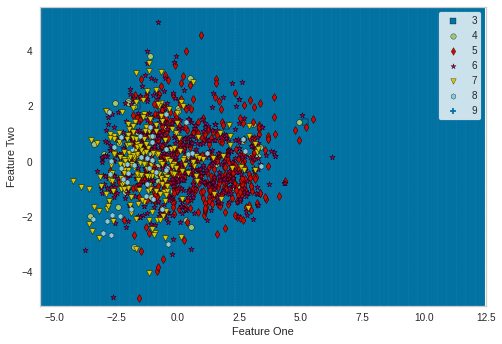

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [21]:
plot_model(tuned_et, plot='boundary')

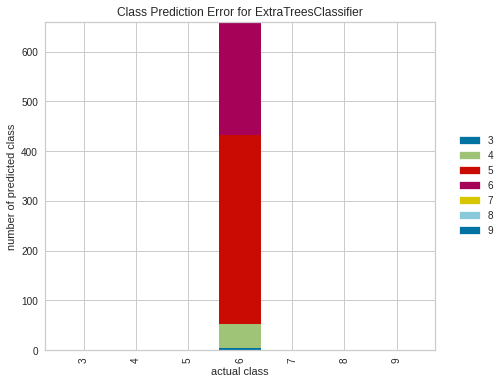

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [23]:
plot_model(tuned_et, plot = 'error')

In [26]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=27, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [29]:
final_et = finalize_model(tuned_et)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=3, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.05, min_impurity_split=None,
                     min_samples_leaf=6, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
                     oob_score=False, random_state=6329, verbose=0,
                     warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=3, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.05, min_

In [30]:
unseen_predictions = predict_model(final_et, data= data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=3, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.05, min_impurity_split=None,
                     min_samples_leaf=6, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
                     oob_score=False, random_state=6329, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.4204,0,0.1667,0.1767,0.2489,0.0,0.0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5,6,0.0015
1,6.5,0.31,0.14,7.50,0.044,34.0,133.0,0.9955,3.22,0.50,9.5,5,6,0.0009
2,7.2,0.24,0.27,1.40,0.038,31.0,122.0,0.9927,3.15,0.46,10.3,6,6,0.0011
3,6.8,0.30,0.23,4.60,0.061,50.5,238.5,0.9958,3.32,0.60,9.5,5,6,0.0009
4,8.6,0.23,0.46,1.00,0.054,9.0,72.0,0.9941,2.95,0.49,9.1,6,6,0.0009


In [32]:
save_model(final_et,'Final ET Model 30NOV2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=3, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.05, min_impurity_split=None,
                     min_samples_leaf=6, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
                     oob_score=False, random_state=6329, verbose=0,
                     warm_start=False), model_name=Final ET Model 30NOV2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_fe

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight={}, criterion='entropy',
                                       max_depth=3, max_features='log2',
                                       max_leaf_nodes

In [33]:
saved_final_et = load_model('Final ET Model 30NOV2022')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final ET Model 30NOV2022, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [34]:
new_prediction = predict_model(saved_final_et, data=data_unseen)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight={}, criterion='entropy',
                                      max_depth=3, max_features='log

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.4204,0,0.1667,0.1767,0.2489,0.0,0.0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5,6,0.0015
1,6.5,0.31,0.14,7.50,0.044,34.0,133.0,0.9955,3.22,0.50,9.5,5,6,0.0009
2,7.2,0.24,0.27,1.40,0.038,31.0,122.0,0.9927,3.15,0.46,10.3,6,6,0.0011
3,6.8,0.30,0.23,4.60,0.061,50.5,238.5,0.9958,3.32,0.60,9.5,5,6,0.0009
4,8.6,0.23,0.46,1.00,0.054,9.0,72.0,0.9941,2.95,0.49,9.1,6,6,0.0009
